In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 7] # указываем размер графика

In [3]:
# чтобы вывести всю таблицу на экран
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
# creating a dataframe
app_stats = pd.read_csv(
    "C:\\Users\\HOME\\ya_datasets\\app_stats.csv")
print(app_stats)

    week_number  installs  payments  ad_campaign
0             0     29486      3541            0
1             1     30830      4275            0
2             2     31970      4404            0
3             3     34361      4463            0
4             4     33968      4358            0
5             5     34912      4310            0
6             6     35118      4427            0
7             7     49296      6836            1
8             8     35969      4366            0
9             9     50182      6426            1
10           10     37169      4774            0
11           11     36579      5082            0
12           12     38198      5025            0
13           13     55226      6420            1
14           14     38932      4804            0
15           15     51316      6299            1
16           16     38067      4884            0
17           17     57437      6146            1
18           18     39399      5084            0
19           19     

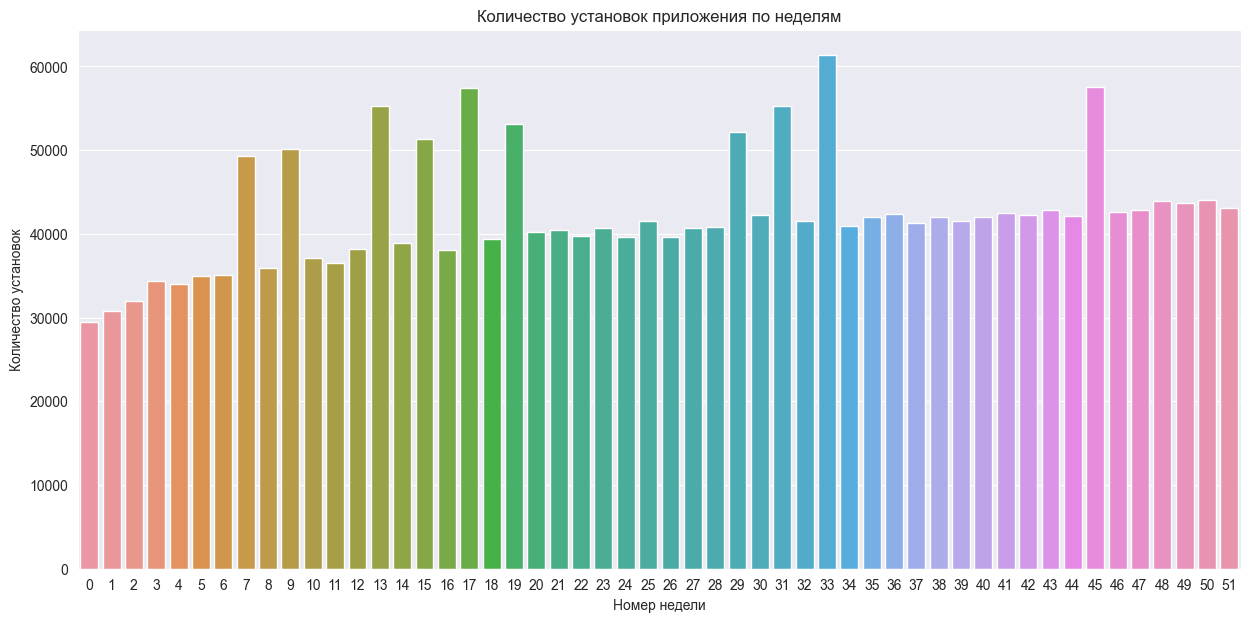

In [12]:
sns.barplot(
    x=app_stats.index,
    y=app_stats["installs"]
)

plt.xlabel("Номер недели")
plt.ylabel("Количество установок")
plt.title("Количество установок приложения по неделям")

plt.show()

Вызовите функцию barplot() из библиотеки seaborn. В качестве оси X столбчатой диаграммы задайте номера недель, а на оси Y отметьте количество установок. Для этого в скобках barplot() укажите x=data['week_number'] и y=data['installs'].

<Axes: xlabel='week_number', ylabel='installs'>

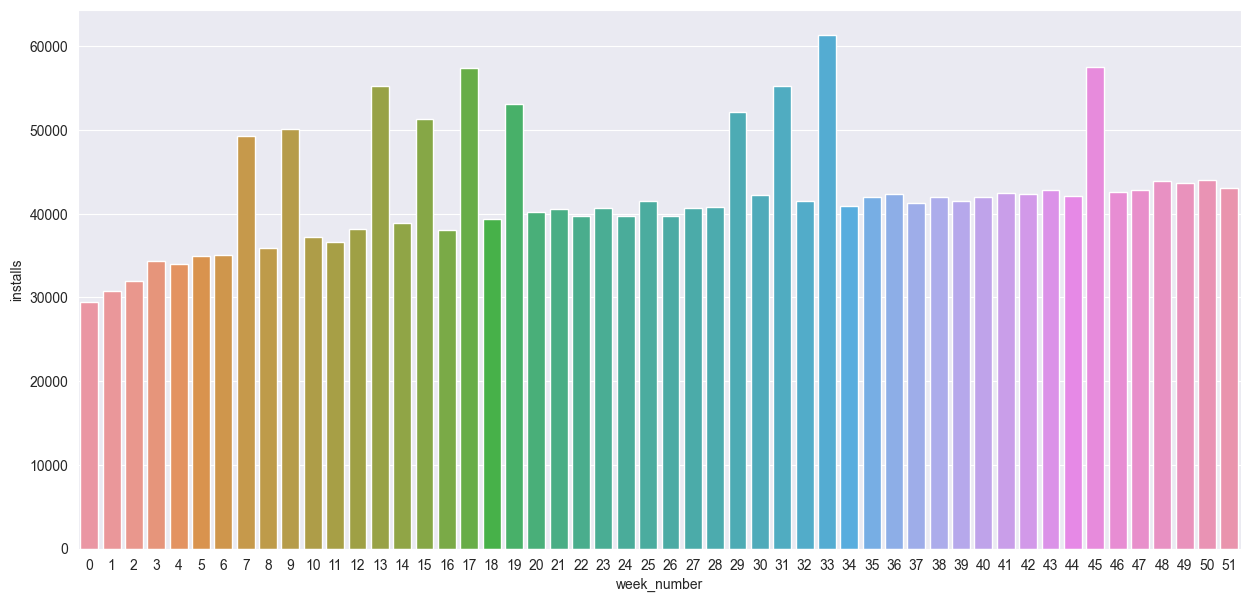

In [13]:
sns.barplot(
    x=app_stats['week_number'],
    y=app_stats['installs']
)

<Axes: xlabel='week_number', ylabel='ad_campaign'>

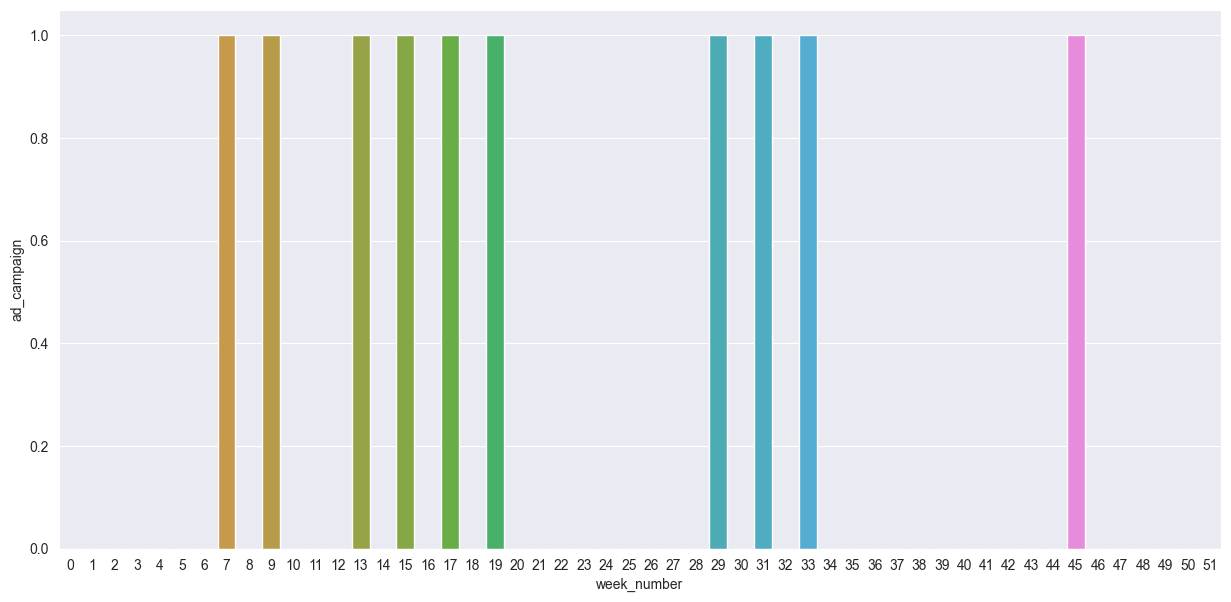

In [14]:
sns.barplot(
    x=app_stats['week_number'],
    y=app_stats['ad_campaign']
)

<Axes: xlabel='week_number', ylabel='payments'>

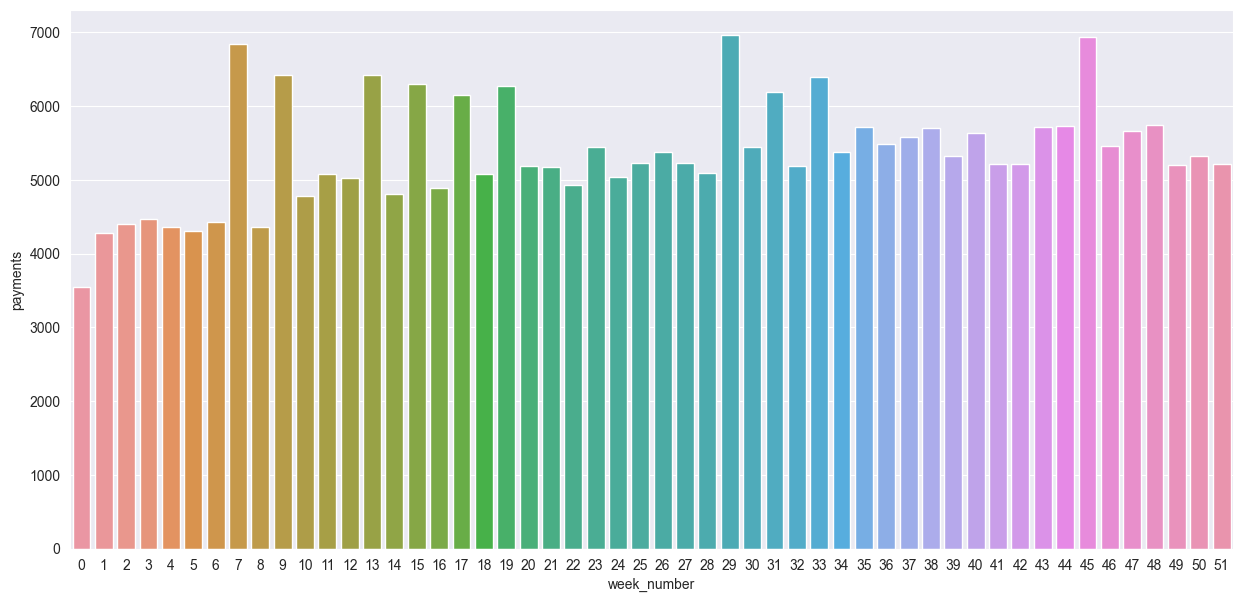

In [15]:
sns.barplot(
    x=app_stats['week_number'],
    y=app_stats['payments']
)

## Вывод по динамике платежей

На столбчатой диаграмме представлено количество покупок платной версии приложения «Книжный грызун» по неделям за год наблюдений.

В течение года число платежей остается в целом стабильным и колеблется примерно в диапазоне от четырех до семи тысяч покупок в неделю. Резких спадов или периодов с нулевым количеством платежей не наблюдается, что указывает на устойчивый спрос на платную версию приложения.

При этом на графике заметны отдельные пики платежей, приходящиеся на несколько недель в течение года. Эти периоды характеризуются максимальными значениями числа покупок и могут быть связаны с ростом числа установок приложения и проведением рекламных кампаний.

В начале года уровень платежей несколько ниже, чем в середине и второй половине года. Далее наблюдается умеренный рост и последующая стабилизация показателя, без выраженного нисходящего тренда.

В целом динамика платежей свидетельствует о стабильной монетизации приложения. Для более глубокого анализа рекомендуется дополнительно сопоставить пики платежей с неделями проведения рекламных кампаний и изменениями в количестве установок.


In [16]:
conversions = app_stats['payments'] / app_stats['installs']
print(conversions)

0     0.120091
1     0.138664
2     0.137754
3     0.129886
4     0.128297
5     0.123453
6     0.126061
7     0.138673
8     0.121382
9     0.128054
10    0.128440
11    0.138932
12    0.131551
13    0.116250
14    0.123395
15    0.122749
16    0.128300
17    0.107004
18    0.129039
19    0.118043
20    0.128935
21    0.127577
22    0.124201
23    0.134073
24    0.126792
25    0.125818
26    0.135536
27    0.128526
28    0.124578
29    0.133379
30    0.128868
31    0.111959
32    0.125078
33    0.104295
34    0.131338
35    0.136041
36    0.129372
37    0.135112
38    0.135548
39    0.128214
40    0.134144
41    0.122889
42    0.123186
43    0.133122
44    0.135987
45    0.120498
46    0.128131
47    0.132071
48    0.130854
49    0.119030
50    0.120828
51    0.121148
dtype: float64


<Axes: xlabel='payments'>

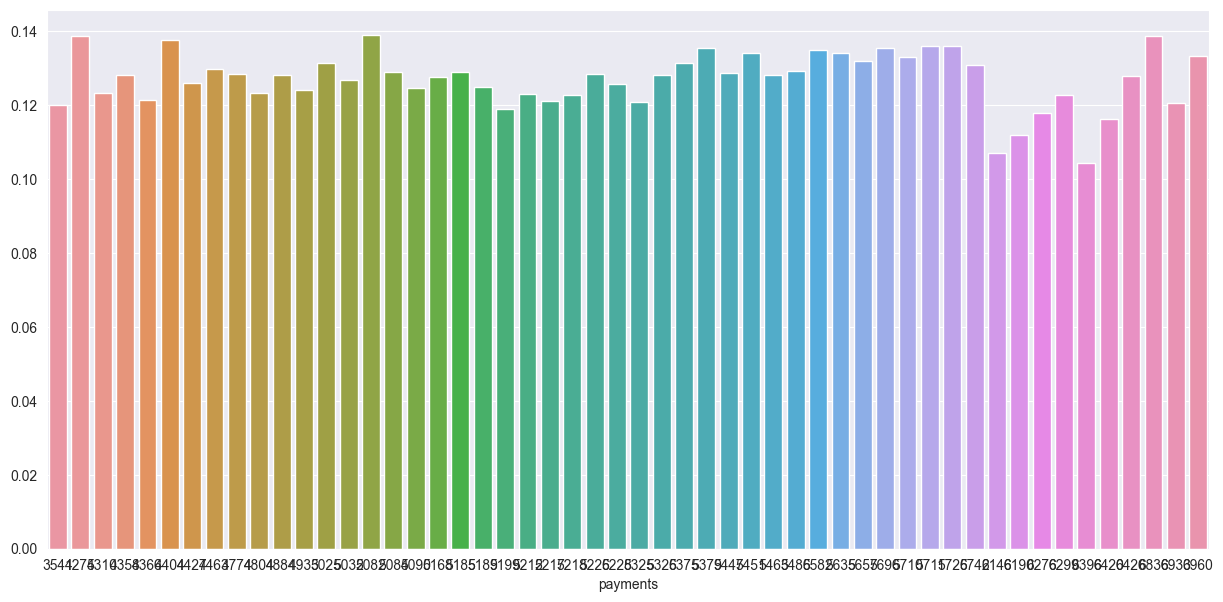

In [19]:
sns.barplot(
    x=app_stats['payments'],
    y=conversions
)

### На графике заметны какие-то провалы — возможно, они тоже связаны с проведением рекламных кампаний. Однако серьёзного изменения конверсии во времени не видно: гипотеза об отличии актуальной конверсии от среднегодовой окончательно опровергнута.

# Правильная конверсия

In [20]:
# список campaign_weeks из 10 чисел
campaign_weeks = [7, 9, 13, 15, 17, 19, 29, 31, 33, 45]

In [28]:
# посчитайте разность между значениями в столбце data['installs']
diff_installs = app_stats['installs'].diff()

# выбор только требуемых недель из всех посчитанных разностей
installs_from_ads = diff_installs[campaign_weeks]

# вывод результата
print(installs_from_ads)

7     14178.0
9     14213.0
13    17028.0
15    12384.0
17    19370.0
19    13768.0
29    11324.0
31    13020.0
33    19840.0
45    15429.0
Name: installs, dtype: float64


In [29]:
# посчитайте разность между соседними значениями в столбце data['payments']
diff_payments = app_stats['payments'].diff()

# выбор только требуемых недель из всех посчитанных разностей
# Из Series diff_payments возьми значения с индексами 7, 9, 13, 15, 17, 19, 29, 31, 33 и 45
payments_from_ads = diff_payments[campaign_weeks] # object[key] --> series[list_of_labels]

# вывод результата
print(payments_from_ads)

7     2409.0
9     2060.0
13    1395.0
15    1495.0
17    1262.0
19    1192.0
29    1870.0
31     743.0
33    1207.0
45    1207.0
Name: payments, dtype: float64


In [30]:
diff_payments.head(10)

0       NaN
1     734.0
2     129.0
3      59.0
4    -105.0
5     -48.0
6     117.0
7    2409.0
8   -2470.0
9    2060.0
Name: payments, dtype: float64

In [33]:
# поделите payments_from_ads на installs_from_ads
conversions_from_ads = payments_from_ads / installs_from_ads
print(conversions_from_ads)

7     0.169911
9     0.144938
13    0.081924
15    0.120720
17    0.065152
19    0.086578
29    0.165136
31    0.057066
33    0.060837
45    0.078229
dtype: float64


## Считаем, сколько денег принесла реклама

In [34]:
# умножим конверсию на 600 и сохраним в ads_install_average_profit
ads_install_average_profit = conversions_from_ads * 600
print(ads_install_average_profit)

7     101.946678
9      86.962640
13     49.154334
15     72.432171
17     39.091378
19     51.946543
29     99.081597
31     34.239631
33     36.502016
45     46.937585
dtype: float64


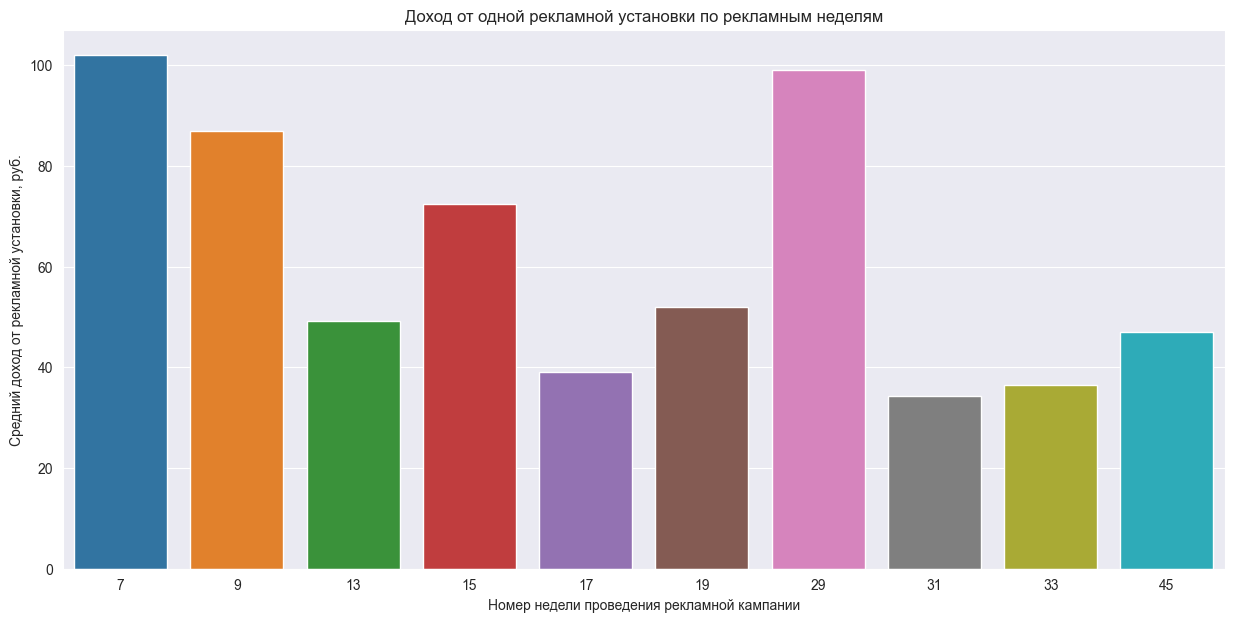

In [36]:
sns.barplot(
    x=campaign_weeks,
    y=ads_install_average_profit
)

plt.xlabel("Номер недели проведения рекламной кампании")
plt.ylabel("Средний доход от рекламной установки, руб.")
plt.title("Доход от одной рекламной установки по рекламным неделям")

plt.show()

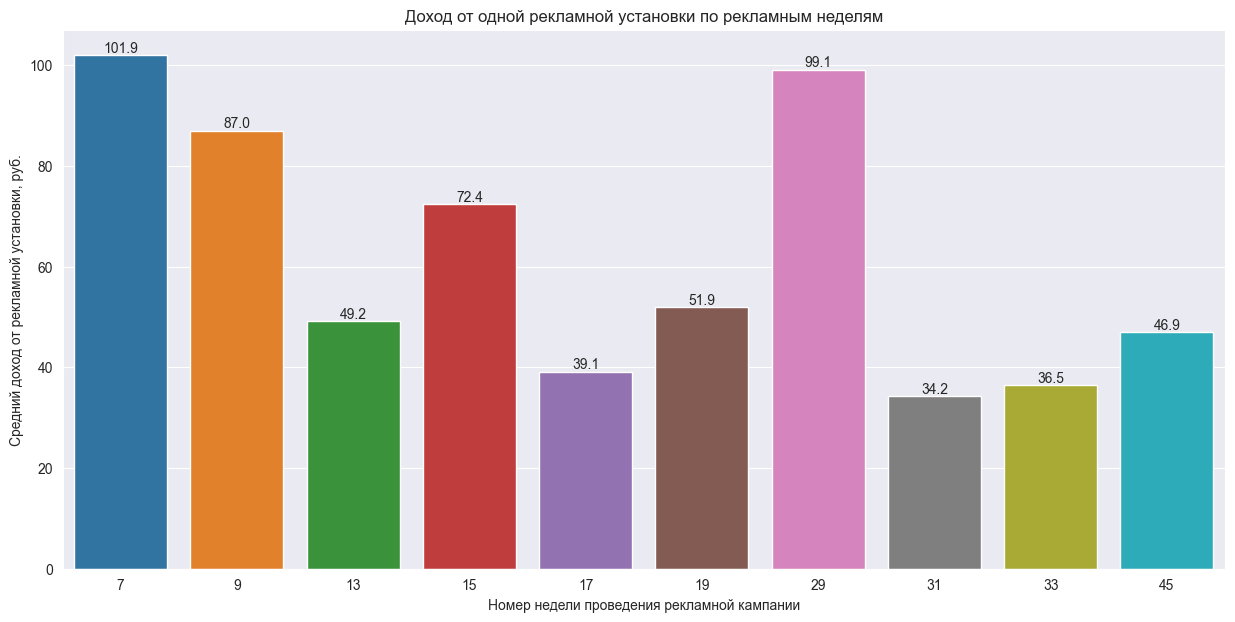

In [38]:
ax = sns.barplot(
    x=campaign_weeks,
    y=ads_install_average_profit
)

plt.xlabel("Номер недели проведения рекламной кампании")
plt.ylabel("Средний доход от рекламной установки, руб.")
plt.title("Доход от одной рекламной установки по рекламным неделям")

# подписи над столбиками
for i, value in enumerate(ads_install_average_profit):
    ax.text(
        i,                      # позиция по X
        value,                  # высота столбца
        f"{value:.1f}",         # текст подписи
        ha='center',
        va='bottom'
    )

plt.show()

### ***Вывод:*** Одна рекламная установка обходится «Книжному грызуну» в 60 рублей. Поэтому, чтобы окупиться, она должна приносить больше этой суммы. На графике видно, что лишь четыре из десяти рекламных кампаний преодолели этот барьер.